In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import sklearn
import  pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)


2.0.0
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)
print(x_train.shape)
print(x_train.shape[1:])

(11610, 8)
(8,)


In [6]:
#   多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30,activation='relu')(input_deep)
hidden2 =  keras.layers.Dense(30,activation='relu')(hidden1)
## 类似于复合函数：f(x) = h (g(x))

concat = keras.layers.concatenate([input_wide,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs =[input_wide,input_deep],outputs=[output])



model.summary()


model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [7]:
x_train_scaled_wide = x_train_scaled[:,:5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:,:5]
x_valid_scaled_deep = x_valid_scaled[:,2:]

x_test_scaled_wide = x_test_scaled[:,:5]
x_test_scaled_deep = x_test_scaled[:,2:]

history = model.fit([x_train_scaled_wide,x_train_scaled_deep], y_train,
                    validation_data = ([x_valid_scaled_wide,x_valid_scaled_deep], y_valid),
                    epochs = 100,
                    callbacks = callbacks)


Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 90us/sample - loss: 1.8236 - val_loss: 0.9702
Epoch 2/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.7412 - val_loss: 0.7425
Epoch 3/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6586 - val_loss: 0.6861
Epoch 4/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.6235 - val_loss: 0.6517
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5974 - val_loss: 0.6234
Epoch 6/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5766 - val_loss: 0.6042
Epoch 7/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5585 - val_loss: 0.5846
Epoch 8/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5436 - val_loss: 0.5697
Epoch 9/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.530

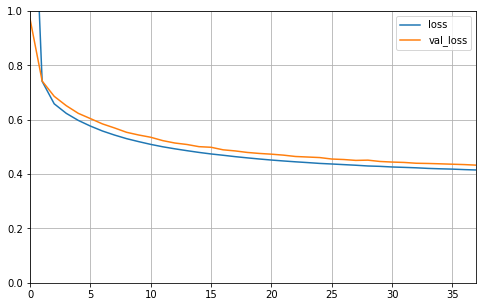

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)


In [9]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep], y_test, verbose=0)

0.42729084445524584